In [6]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import boxcox
from precision_recall_cutoff import precision_recall_cutoff

s3= boto3.resource('s3')
bucket_name= 'morgan-gant-data448-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'turnover.csv'

bucket_object= bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datefile
turnover = pd.read_csv(file_content_stream)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#changing to dummy variables
turnover= pd.concat([turnover.drop(columns=['sales', 'salary'], axis=1), pd.get_dummies(turnover[['sales', 'salary']])], axis=1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.479\nsamples = 3361\nvalue = [1339, 2022]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.212\nsamples = 1377\nvalue = [166, 1211]'),
 Text(0.0625, 0.125, 'gini = 0.102\nsamples = 1274\nvalue = [69, 1205]'),
 Text(0.1875, 0.125, 'gini = 0.11\nsamples = 103\nvalue = [97, 6]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.483\nsamples = 1984\nvalue = [1173, 811]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 717\nvalue = [0, 717]'),
 Text(0.4375, 0.125, 'gini = 0.137\nsamples = 1267\nvalue = [1173, 94]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.175\nsamples = 8638\nvalue = [7803, 835]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.028\nsamples = 7042\nvalue = [6942, 100]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7037\nvalue = [6942, 95]'),
 Text(0.6875, 0.125, 'gini = 0.0

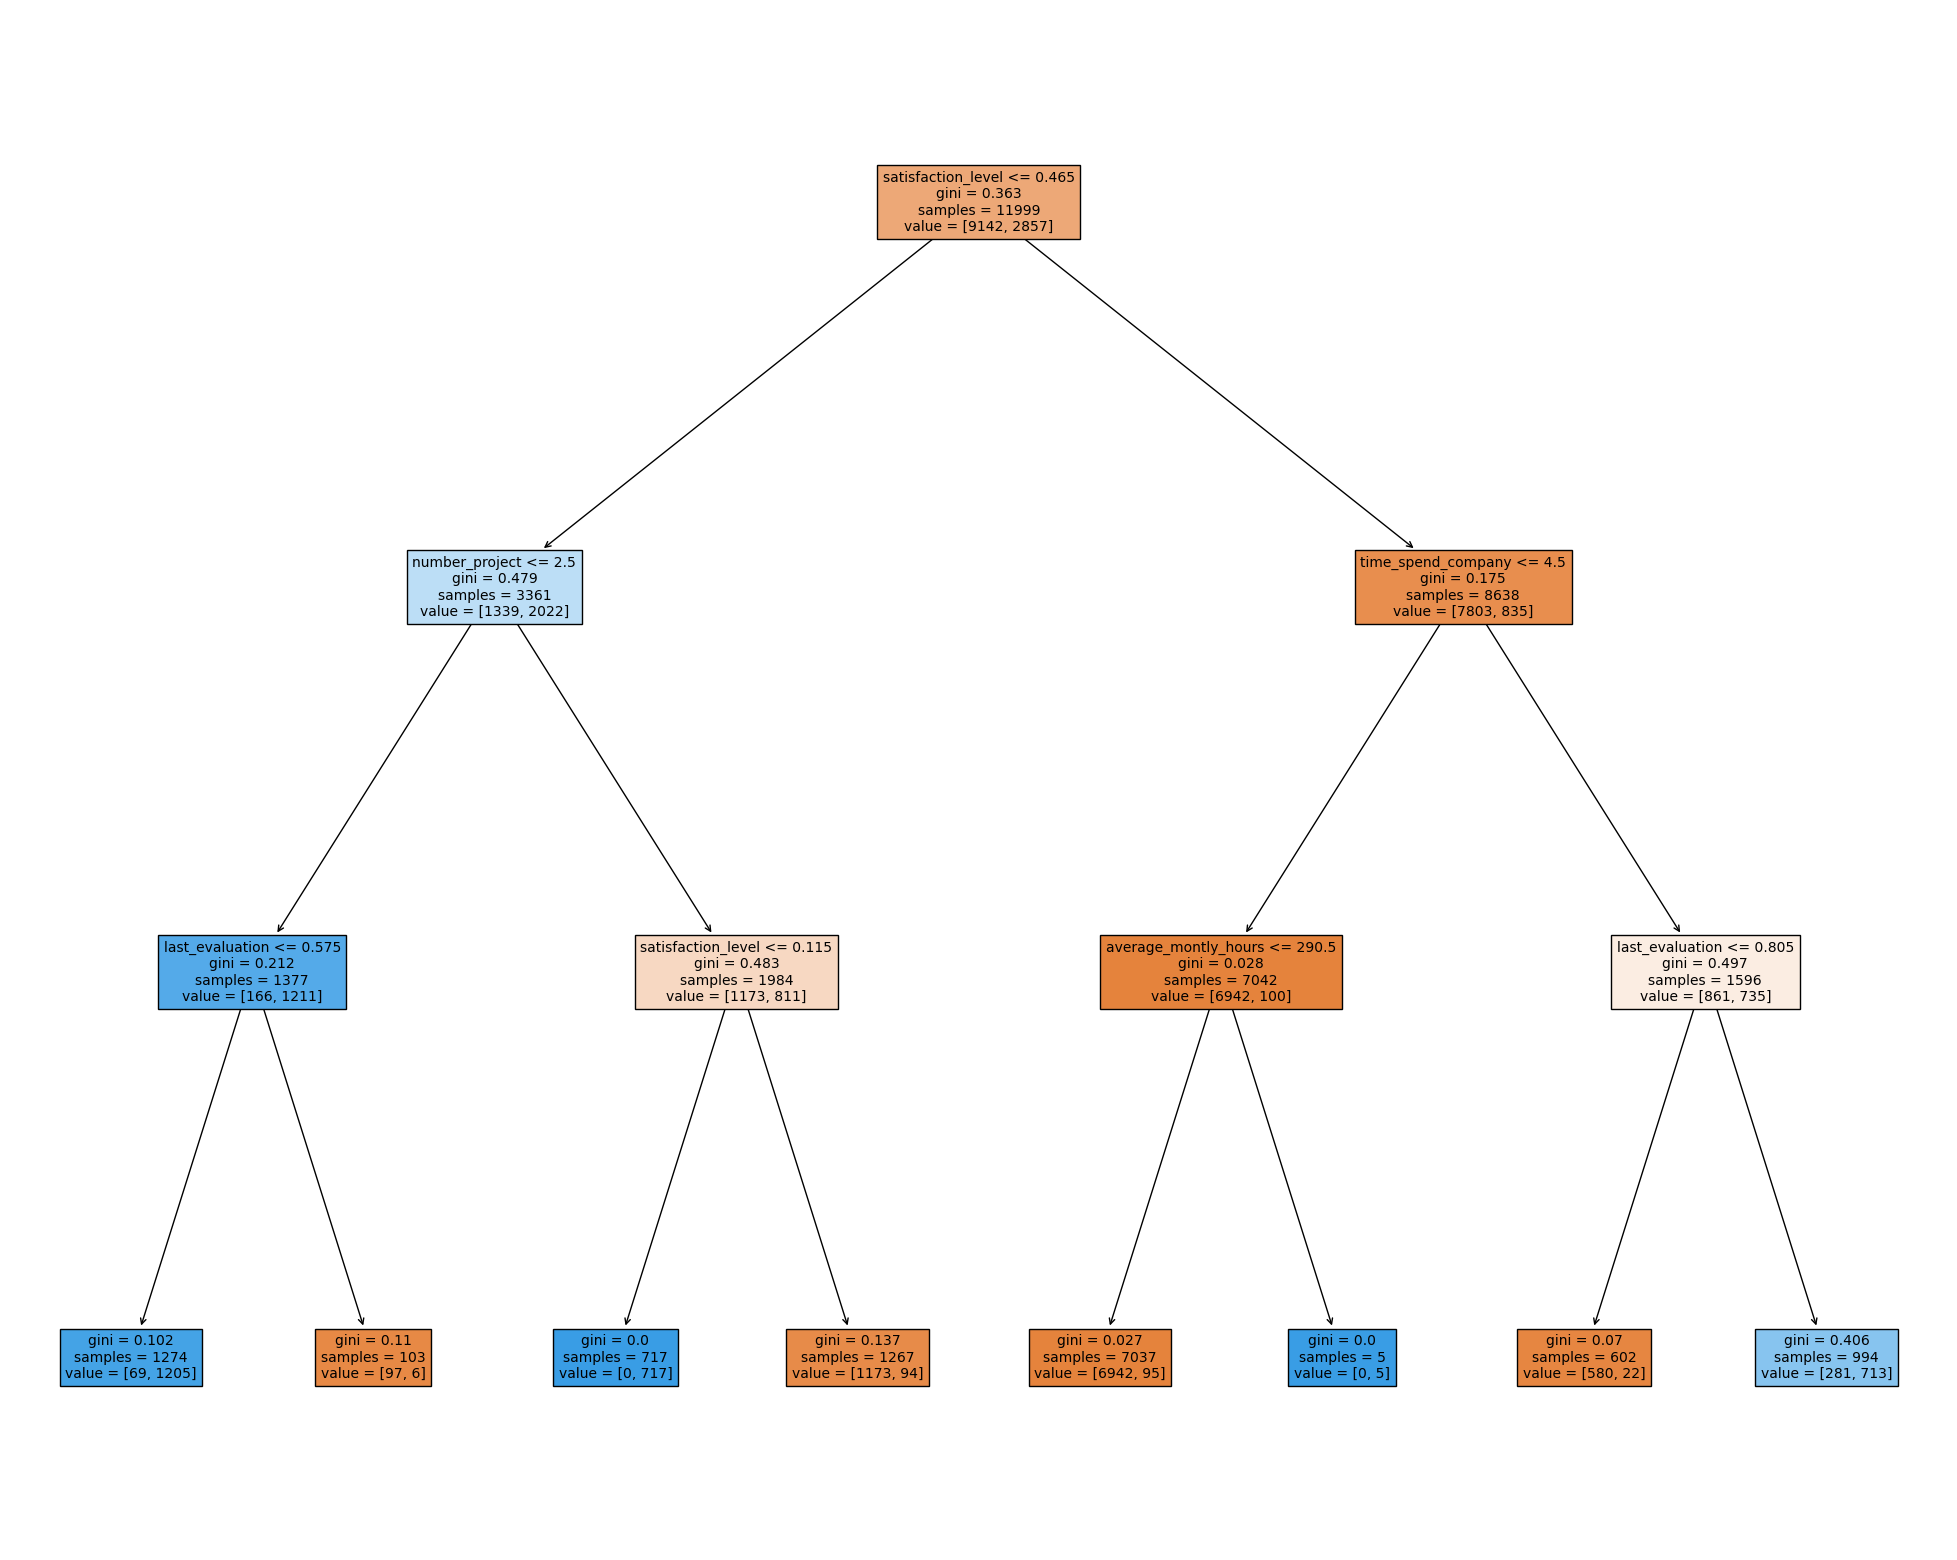

In [9]:
#Defining input and target variables
x= turnover.drop(columns= 'left', axis=1)
y= turnover['left']

#splitting the data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= .2, stratify= y)

#building decison tree
tree_md= DecisionTreeClassifier(max_depth= 3).fit(x_train, y_train)
fig=plt.figure(figsize= (25,20))
plot_tree(tree_md, feature_names= x_train.columns, filled=True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.479\nsamples = 3368\nvalue = [1340, 2028]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.21\nsamples = 1418\nvalue = [169, 1249]'),
 Text(0.0625, 0.125, 'gini = 0.101\nsamples = 1315\nvalue = [70, 1245]'),
 Text(0.1875, 0.125, 'gini = 0.075\nsamples = 103\nvalue = [99, 4]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.48\nsamples = 1950\nvalue = [1171, 779]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 687\nvalue = [0, 687]'),
 Text(0.4375, 0.125, 'gini = 0.135\nsamples = 1263\nvalue = [1171, 92]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.174\nsamples = 8631\nvalue = [7802, 829]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.026\nsamples = 7031\nvalue = [6939, 92]'),
 Text(0.5625, 0.125, 'gini = 0.024\nsamples = 7024\nvalue = [6939, 85]'),
 Text(0.6875, 0.125, 'gini = 0.0\n

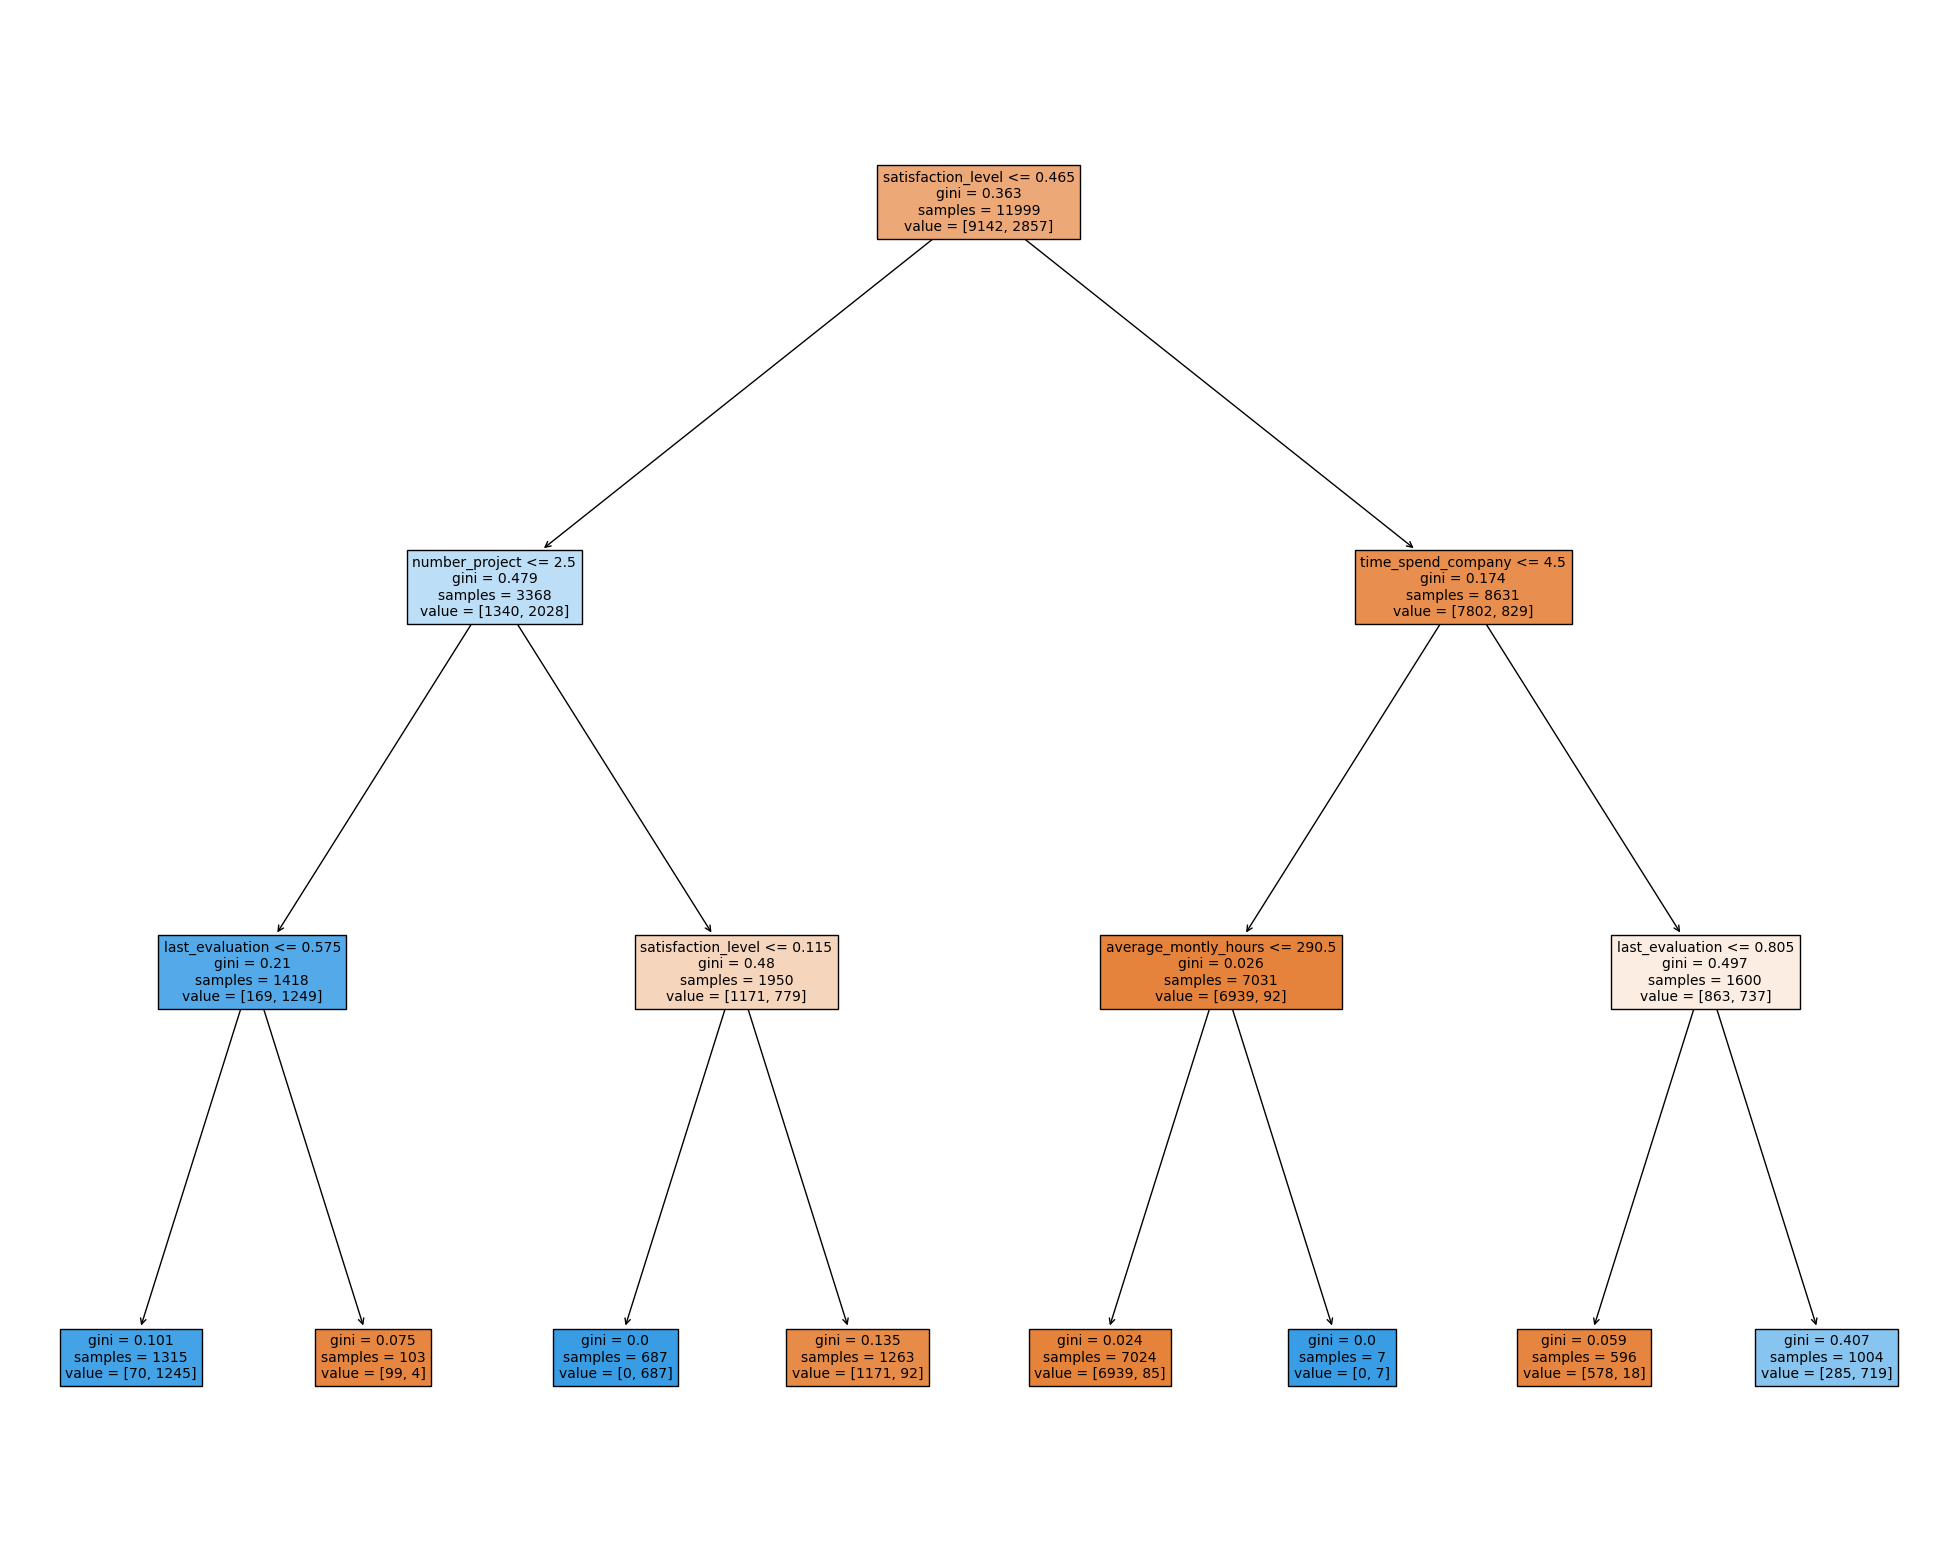

In [10]:
#Defining input and target variables
x= turnover.drop(columns= 'left', axis=1)
y= turnover['left']

#splitting the data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= .2, stratify= y)

#building decison tree
tree_md= DecisionTreeClassifier(max_depth= 3).fit(x_train, y_train)
fig=plt.figure(figsize= (25,20))
plot_tree(tree_md, feature_names= x_train.columns, filled=True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.477\nsamples = 3356\nvalue = [1318, 2038]'),
 Text(0.125, 0.375, 'average_montly_hours <= 162.0\ngini = 0.203\nsamples = 1408\nvalue = [161, 1247]'),
 Text(0.0625, 0.125, 'gini = 0.101\nsamples = 1307\nvalue = [70, 1237]'),
 Text(0.1875, 0.125, 'gini = 0.178\nsamples = 101\nvalue = [91, 10]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.482\nsamples = 1948\nvalue = [1157, 791]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 702\nvalue = [0, 702]'),
 Text(0.4375, 0.125, 'gini = 0.133\nsamples = 1246\nvalue = [1157, 89]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.172\nsamples = 8643\nvalue = [7824, 819]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.027\nsamples = 7070\nvalue = [6974, 96]'),
 Text(0.5625, 0.125, 'gini = 0.025\nsamples = 7062\nvalue = [6974, 88]'),
 Text(0.6875, 0.125, 'gini

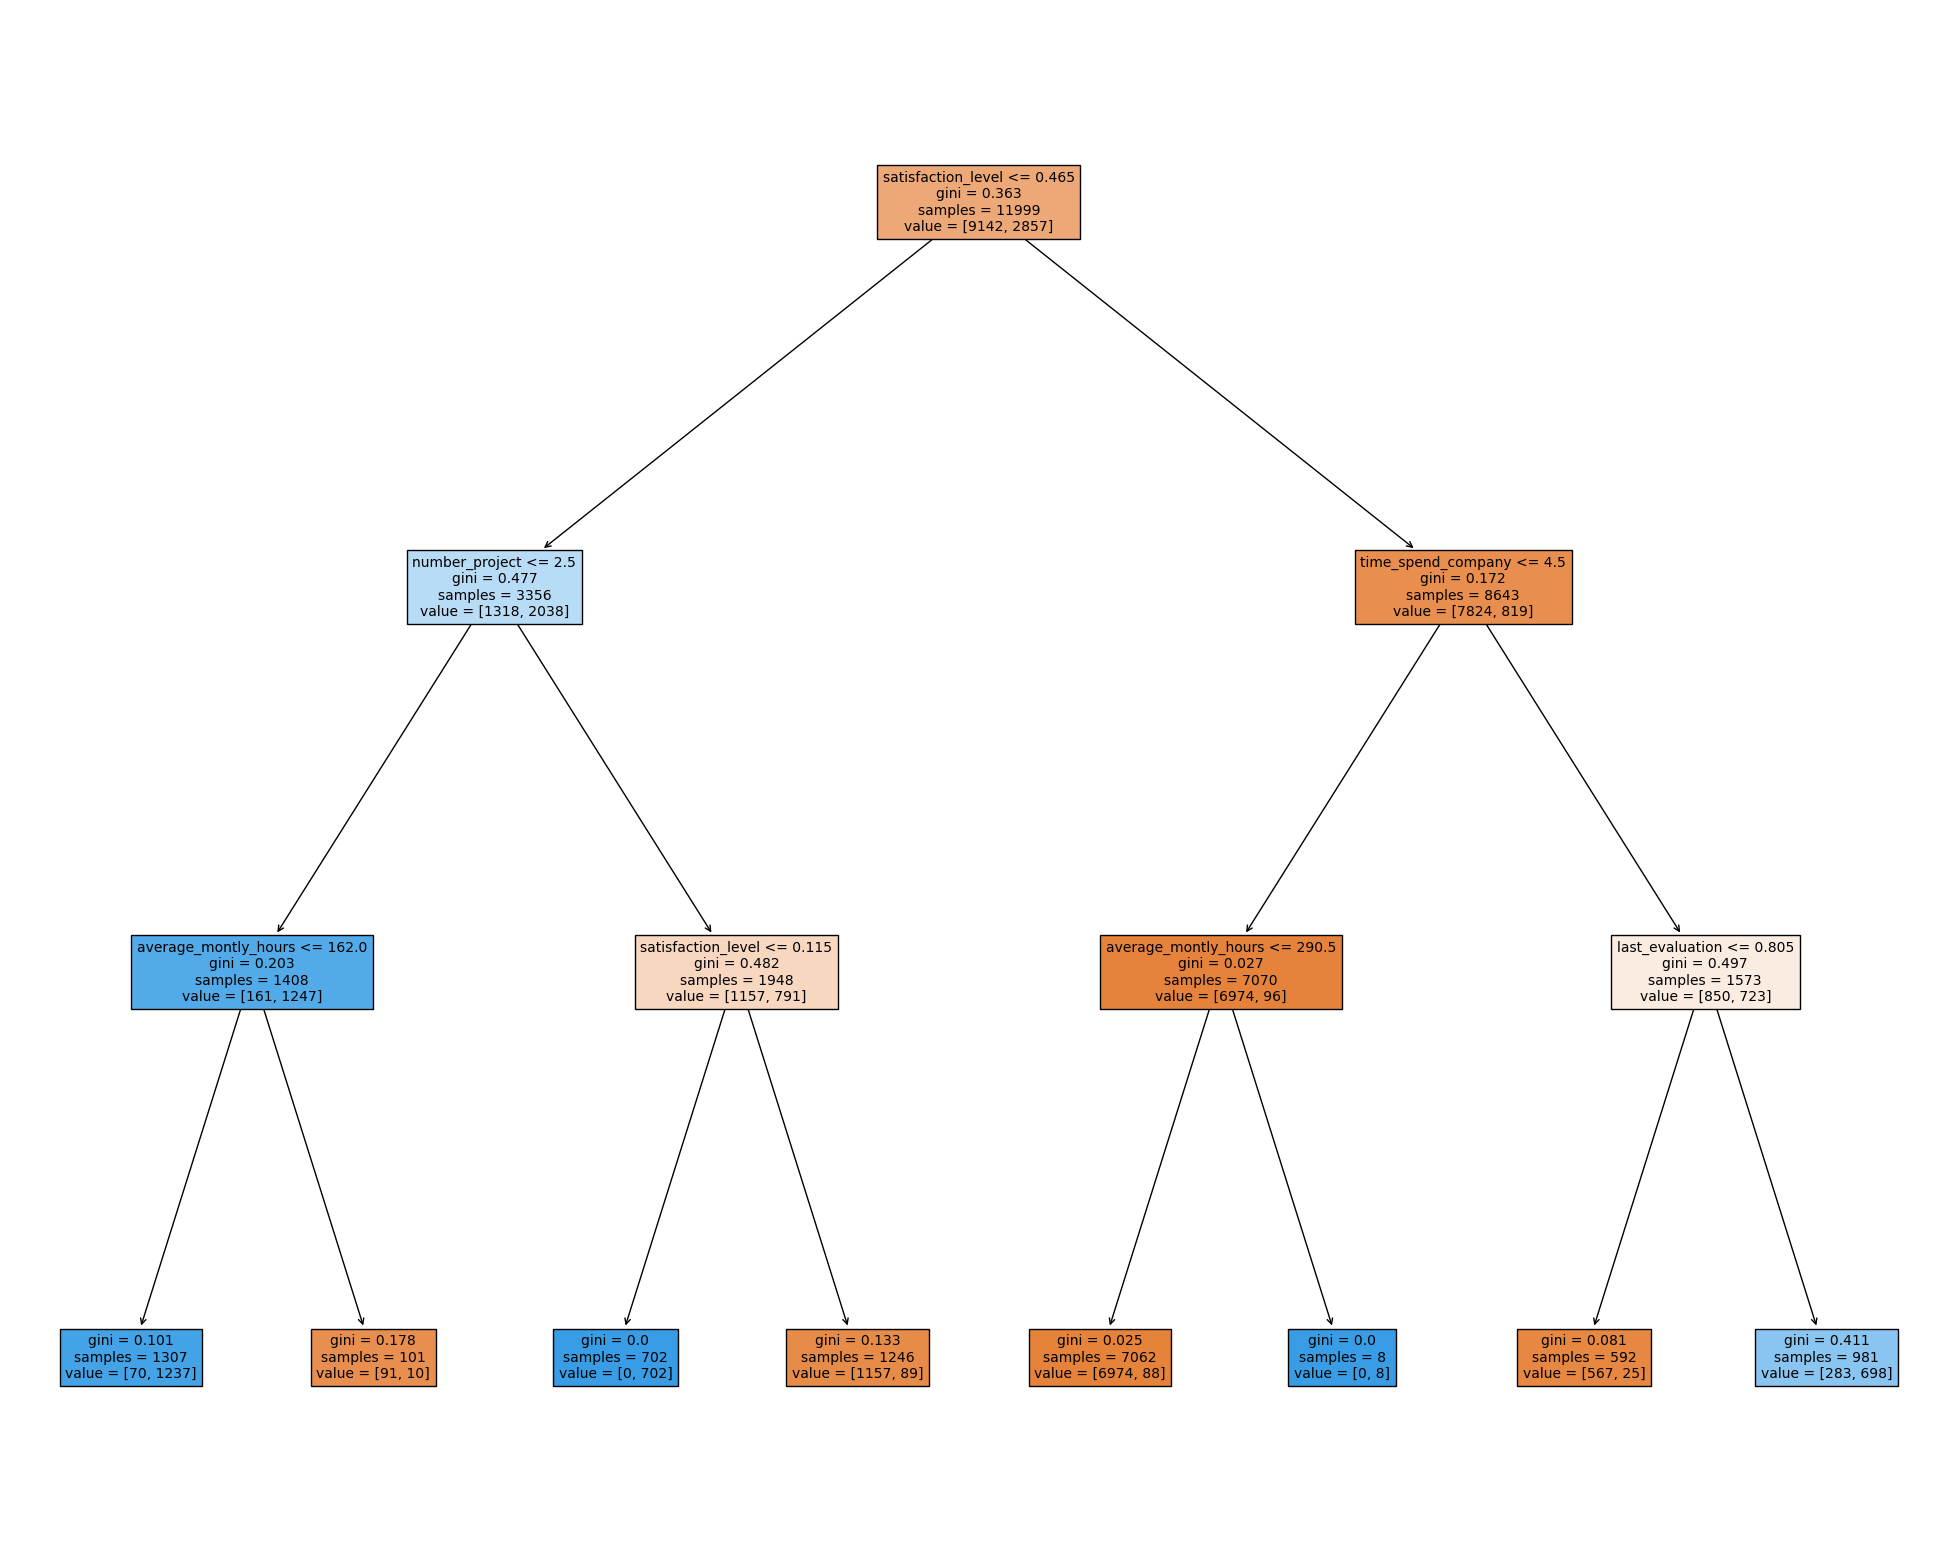

In [11]:
#Defining input and target variables
x= turnover.drop(columns= 'left', axis=1)
y= turnover['left']

#splitting the data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= .2, stratify= y)

#building decison tree
tree_md= DecisionTreeClassifier(max_depth= 3).fit(x_train, y_train)
fig=plt.figure(figsize= (25,20))
plot_tree(tree_md, feature_names= x_train.columns, filled=True)

In [15]:
#engineering features from the decisoon tree model
turnover['interaction_1']=np.where(((turnover['satisfaction_level'] >= .115) &
                                   (turnover['satisfaction_level'] >= .465) &
                                   (turnover['number_project'] > 2.5)), 1, 0)

turnover['interaction_2']=np.where(((turnover['satisfaction_level'] >= .465) &
                                   (turnover['number_project'] <=2.5) &
                                   (turnover['last_evaluation'] <= .575)), 1, 0)
        
turnover['interaction3']=np.where(((turnover['satisfaction_level'] >= .465) &
                                    (turnover['time_spend_company'] <=4.5) &
                                    (turnover['average_montly_hours'] <=290.5)), 1,0)
                                

In [16]:
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,interaction_1,interaction_2,interaction3
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
